In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, f1_score, confusion_matrix
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("amazonreviews.tsv", sep="\t", quoting=3)

In [3]:
df.columns = [c.strip().lower() for c in df.columns]

In [4]:
df.head()

,label,review
0,pos,Stuning even for the non-gamer: This sound tra...
1,pos,The best soundtrack ever to anything.: I'm rea...
2,pos,"""Amazing!: This soundtrack is my favorite musi..."
3,pos,Excellent Soundtrack: I truly like this soundt...
4,pos,"Remember, Pull Your Jaw Off The Floor After He..."


In [5]:
df = df.drop_duplicates(subset=["label","review"])
df = df.dropna(subset=["review"])

In [6]:
df["review"] = df["review"].astype(str).str.lower()
df["review"] = df["review"].apply(lambda x: re.sub(r"http\S+|<.*?>", " ", x))
df["review"] = df["review"].apply(lambda x: re.sub(r"[^a-z0-9\s]", " ", x))
df["review"] = df["review"].str.replace(r"\s+", " ", regex=True).str.strip()

In [8]:
# Map labels to numeric
df["label_num"] = df["label"].map({"neg":0, "pos":1})

In [9]:
#Label Distribution
df["label"].value_counts()

label
neg    5097
pos    4903
Name: count, dtype: int64

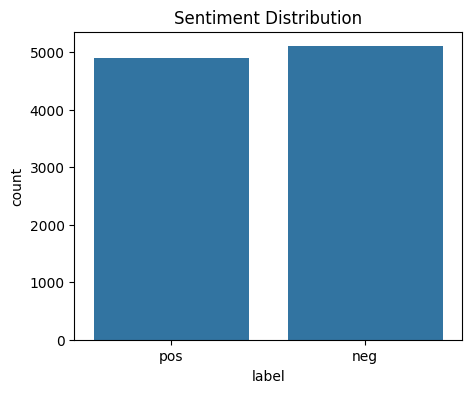

In [10]:
plt.figure(figsize=(5,4))
sns.countplot(x=df["label"])
plt.title("Sentiment Distribution")
plt.show()

In [11]:
# WordCloud for positive / negative words
pos_reviews = " ".join(df[df.label=="pos"]["review"].tolist())
neg_reviews = " ".join(df[df.label=="neg"]["review"].tolist())

(np.float64(-0.5), np.float64(499.5), np.float64(299.5), np.float64(-0.5))

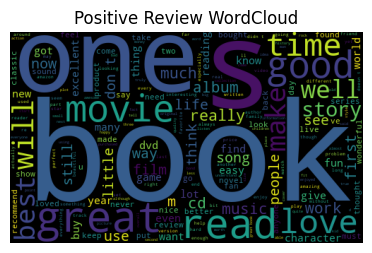

In [12]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.imshow(WordCloud(width=500, height=300).generate(pos_reviews))
plt.title("Positive Review WordCloud")
plt.axis("off")

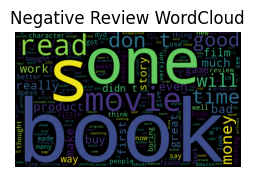

In [13]:
plt.subplot(1,2,2)
plt.imshow(WordCloud(width=500, height=300).generate(neg_reviews))
plt.title("Negative Review WordCloud")
plt.axis("off")
plt.show()

In [14]:
X = df["review"]
y = df["label_num"]

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [16]:
# MODEL PIPELINE 
tfidf = TfidfVectorizer(stop_words="english", ngram_range=(1,2), max_df=0.9, min_df=3)

In [17]:
model = LogisticRegression(max_iter=1000)

In [18]:
grid = {"C":[0.5,1,2,3]}

In [ ]:
clf = GridSearchCV(model, grid, cv=3, scoring="f1")
clf.fit(tfidf.fit_transform(X_train), y_train)

,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",LogisticRegre...max_iter=1000)
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'C': [0.5, 1, ...]}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",'f1'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",None
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",3
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computation time for each fold and parameter candidate is displayed;- >2 : the score is also displayed;- >3 : the fold and candidate parameter in

In [20]:
best_model = clf.best_estimator_


In [21]:
# EVALUATION 
X_test_tfidf = tfidf.transform(X_test)
y_pred = best_model.predict(X_test_tfidf)

print("\nBest Params:", clf.best_params_)
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nF1 Score:", f1_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Best Params: {'C': 3}

Accuracy: 0.8585

F1 Score: 0.8532918610679109

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.86      0.86      1037
           1       0.85      0.85      0.85       963

    accuracy                           0.86      2000
   macro avg       0.86      0.86      0.86      2000
weighted avg       0.86      0.86      0.86      2000



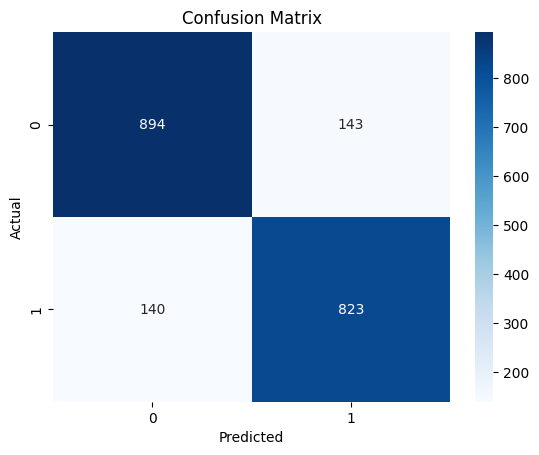

In [22]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [23]:
# SAMPLE PREDICTION 
sample_text = "This product is amazing and works perfectly!"
sample_vec = tfidf.transform([sample_text])
pred = best_model.predict(sample_vec)[0]

print("\nSample Review:", sample_text)
print("Predicted Sentiment:", "Positive" if pred==1 else "Negative")


Sample Review: This product is amazing and works perfectly!
Predicted Sentiment: Positive
